In [ ]:
#Clustering Algorithm(unsupervised learning to supervised learning)

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#load dataset
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# using .iloc column 3 and 4 assigned to variable x
x=df.iloc[:,[3,4]].values


Text(0.5, 1.0, 'mall customer')

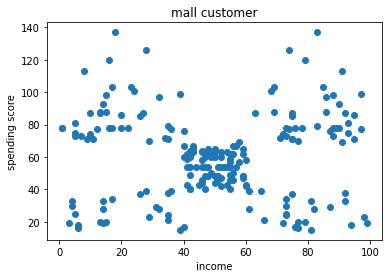

In [4]:
#plot data points
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.xlabel('income')
plt.ylabel('spending score')
plt.title('mall customer')


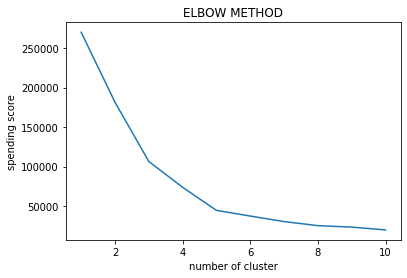

In [5]:
#Here we don't know the k value so choose randomly k value
list1 = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
    #append meaans adding kmeans with inertia(sum of squared error
    
#ELBOW GRAPH    
plt.plot(range(1,11),list1)
plt.title('ELBOW METHOD')
plt.xlabel('number of cluster')
plt.ylabel('spending score')
plt.show()

In [6]:
#fit and predict
kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [7]:
#Adding cluster column into main dataset

supervised=pd.DataFrame(df)
supervised['Cluster_group']=y_kmeans
supervised.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


C:\Users\Yaazh\anaconda3\envs\ai\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


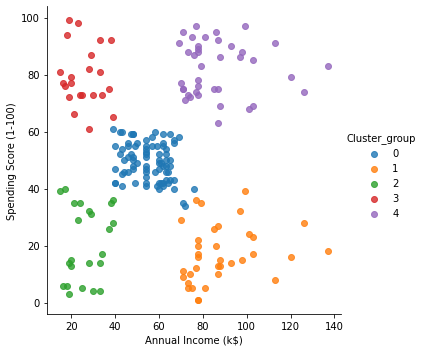

In [8]:
#printing the final dataset
import seaborn as sns
facet = sns.lmplot(data=df, x=df.columns[3], y=df.columns[4], hue=df.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

#we created 5 clusters

In [9]:
#cluster_to_classificaation
import numpy as np
import pandas as pd

In [10]:
df1=pd.DataFrame(supervised)
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [11]:
#here the gender column is string get_dummies convert string to binary value and its is assigned ato new variable df2
df2=pd.get_dummies(df1,drop_first=True)


In [13]:
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_group,Genre_Male
0,1,19,15,39,2,1
1,2,21,15,81,3,1
2,3,20,16,6,2,0
3,4,23,16,77,3,0
4,5,31,17,40,2,0


In [14]:
#drop unwanted column
df2=df2.drop('CustomerID',axis=1)


In [18]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster_group,Genre_Male
0,19,15,39,2,1
1,21,15,81,3,1
2,20,16,6,2,0
3,23,16,77,3,0
4,31,17,40,2,0


In [20]:
# assigning input columns
indep=df2.iloc[:,[0,1,2,4]]
indep.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [22]:
#assignig output columns
dep=df2.iloc[:,[3]]
dep.head()

,Cluster_group
0,2
1,3
2,2
3,3
4,2


In [23]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [24]:
#model creation using random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
        

C:\Users\Yaazh\anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [25]:
#predition 
y_pred = classifier.predict(X_test)
        

In [26]:
y_pred

array([2, 1, 0, 0, 4, 1, 3, 0, 2, 1, 0, 4, 0, 1, 0, 3, 3, 1, 3, 0, 4, 4,
       3, 4, 0, 0, 4, 4, 0, 2, 2, 0, 1, 0, 2, 4, 4, 2, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 0, 0, 4, 0, 0, 0, 0, 4, 2, 2, 0, 2, 0, 4, 0, 4, 3, 4, 0,
       0])

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)       

[[22  0  0  0  0]
 [ 5  8  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  6  0]
 [ 1  0  0  0 14]]


In [28]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        22
           1       1.00      0.62      0.76        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       1.00      0.93      0.97        15

    accuracy                           0.91        67
   macro avg       0.96      0.91      0.92        67
weighted avg       0.93      0.91      0.91        67



In [32]:
#Depolyment
import pickle
filename='unsupervised_to_supervised.sav'
pickle.dump(classifier,open(filename,'wb'))


In [34]:
load_model=pickle.load(open(filename,'rb'))

In [38]:
age=int(input('age:'))
income=int(input('anual income:'))
spending=int(input('spending_score:'))
gender=int(input('state 0 or 1:'))

age:19
anual income:15
spending_score:39
state 0 or 1:0


In [39]:
result=load_model.predict([[age,income,spending,gender]])

C:\Users\Yaazh\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
result

array([2])